<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Principal Component Analysis recap
- PCA in practice: coordinate systems, projections

<hr/>

<h1><font color="darkblue">Principal Component Analysis</font></h1>

<!--<img src="files/800px-GaussianScatterPCA.png" width=300 align=left>-->
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/440px-GaussianScatterPCA.svg.png" width=300 align="right">


### What Features?

- High-dimensional data
- Data transformations
- Interesting directions
- Linear combinations
- Rotated coordinate system

### Location & Dispersion

- 1-dimensional

> For example, mean and variance

- $N$-dimensional

> E.g., again mean (duh!) and covariance matrix




### Principal Components

- Eigensystem of a covariance matrix is special

> $\displaystyle  C\,\boldsymbol{e}_k = \lambda_k\,\boldsymbol{e}_k \ \ \ $ for all $k=1\dots{}N$ 
><br/><br/>
> where
><br/><br/>
> $\displaystyle \boldsymbol{e}_k^T \boldsymbol{e}_l = \delta_{kl} \ \ \ $ for all $k$ and $l$

- The 1st principal component 

> The direction of maximum variance is the eigenvector $\boldsymbol{e}_1$ 
> that belongs to the largest eigenvalue $\lambda_1$
> and $\lambda_1$ is the variance along that direction

### Linear Combination

- If $X$ is a linear combination of the eigenvectors

> $\displaystyle  X = \sum_k \beta_{k} \boldsymbol{e}_k  =  E\,\boldsymbol\beta$ 
><br/><br/>
> with orthonormal $E=[\boldsymbol{e}_1, ..., \boldsymbol{e}_N]$ eigenbasis

- We get the (random variable) coefficients

> $\displaystyle  \boldsymbol{\beta} = E^T\,X$ 
><br/><br/>
> because $E^T{}E = I$

### Coordinate Transformation

- New covariance matrix is diagonal and the elements are the eigenvalues of $C$

> If $\beta=E^T X$ and again assuming $\mathbb{E}[X]=0$ then
><br/><br/>
> $\displaystyle \ \ \ \ \ \ \ \ \mathbb{E}[\beta \beta^T] = \mathbb{E}[E^T X\,X^T E] = E^T C\,E = \Lambda$
><br/><br/>
> where 
><br/><br/>
>$\displaystyle \ \ \ \ \ \ \ \ \Lambda =  \left( \begin{array}{ccc}
{\lambda_1} & 0 & \cdots & 0\\
0 & {\lambda_2} &   & \vdots\\
\vdots &  & \ddots & 0 \\
0 & \cdots & 0 & {\lambda_N} \\
\end{array} \right)$

<!-- -->

> Recall $C\,\boldsymbol{e}_l = \lambda_l\,\boldsymbol{e}_l$ for all $l$, so the $(k,l)$ element of the new covariance matrix 
><br/><br/>
>$\displaystyle \ \ \ \ \ \ \ \ \boldsymbol{e}_k^T C\,\boldsymbol{e}_l = \lambda_l\,\boldsymbol{e}_k^T  \boldsymbol{e}_l  = \lambda_l\delta_{kl} = \Lambda_{kl}$

### Eigendecomposition 

- If we multiply with $E$ and $E^T$ from left and right 

> $ C = E\,\Lambda\,E^T$
><br/><br/>
> or
><br/><br/>
>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) $

### Largest Eigenvalues

- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $K<N$ eigenvectors, the best is to take the ones belonging to the $K$ largest eigenvalues PCs
><br/><br/>
> $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) =  E_K\Lambda_KE_K^T$



### Dimensionality Reduction


- A truncated set of eigenvectors $E_K$ defines a transformation that reduces the dimensionality from $N$ to $K$ while preserving the most variance possible

> $\displaystyle  \beta_K = E_K^T\, X $
><br/><br/>
> and
><br/><br/>
> $\displaystyle  X_K = E_K \beta_K = E_K E_K^T\, X = P_K\,X $




### Random Sample from Bivariate Normal 

- See previous lecture

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
# generate many 2D (column) vectors 
np.random.seed(42)
N = scipy.stats.norm(0,1).rvs((2,50))

# copy and scale it
S = np.copy(N)
S[0,:] *= 4  # scale first components

# rotate it
f = np.pi / 4  # rotate by 45 degrees
R = np.array([[np.cos(f), -np.sin(f)],
              [np.sin(f),  np.cos(f)]]) 
X = R @ S

# shift it by some random (column) vector
X += np.array([[1],
               [3]])

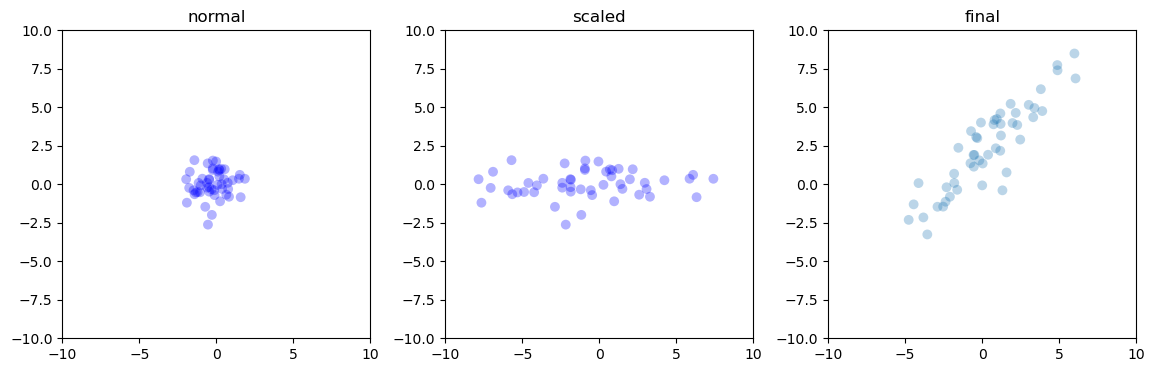

In [3]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1).set_aspect('equal'); plt.xlim(-10,10); plt.ylim(-10,10); plt.title('normal')
plt.scatter(N[0,:], N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none')

plt.subplot(1,3,2).set_aspect('equal'); plt.xlim(-10,10); plt.ylim(-10,10); plt.title('scaled')
plt.scatter(S[0,:], S[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none')

plt.subplot(1,3,3).set_aspect('equal'); plt.xlim(-10,10); plt.ylim(-10,10); plt.title('final')
plt.scatter(X[0,:], X[1,:], marker='o', s=50, alpha=0.3, edgecolor='none');

In [4]:
# subtract sample mean
avg = X.mean(axis=1, keepdims=True)
X -= avg

# sample covariance matrix
C = X @ X.T / (X.shape[1] - 1) 

print (f'''
Average has shape: {avg.shape}:
{avg}

Covariance has shape {C.shape}:
{C}
''')


Average has shape: (2, 1):
[[0.34969052]
 [2.37483646]]

Covariance has shape (2, 2):
[[6.99670167 6.59167706]
 [6.59167706 7.71554082]]



In [5]:
# eigen decomposition of the sample covariance matrix
L, E = np.linalg.eig(C)
print (f'''Eigenvalues: {L}
Eigenvectors in the columns of E: 
{E}''')

Eigenvalues: [ 0.75465255 13.95758994]
Eigenvectors in the columns of E: 
[[-0.72610102 -0.68758803]
 [ 0.68758803 -0.72610102]]


In [6]:
# singular value decomposition of covariance yields the same
E, L, E_same = np.linalg.svd(C)

print (f'''Eigenvalues: {L}
Eigenvectors in the columns of E: 
{E}''')

Eigenvalues: [13.95758994  0.75465255]
Eigenvectors in the columns of E: 
[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]]


In [7]:
np.allclose(E, E_same)

True

In [8]:
# it's a rotation!
E @ E.T

array([[ 1.00000000e+00, -7.47501799e-18],
       [-7.47501799e-18,  1.00000000e+00]])

In [9]:
# also 
np.allclose(E.T, np.linalg.inv(E))

True

In [10]:
# singular value decomposition of data matrix yields also the same
U, W, V = np.linalg.svd(X)

print (f'''Eigenvalues calculated from W: {np.square(W) / (X.shape[1] - 1)}
Eigenvectors in the columns of U: 
{U}''') 

Eigenvalues calculated from W: [13.95758994  0.75465255]
Eigenvectors in the columns of U: 
[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]]


In [11]:
# check out the properties of U and V
[ np.allclose( U.T @ U, np.eye(U[:,0].size) ), 
  np.allclose( V.T @ V, np.eye(V[:,0].size) )  ]

[True, True]

In [12]:
U.shape, V.shape

((2, 2), (50, 50))

In [13]:
# principle components by sklearn
from sklearn import decomposition

In [14]:
# object-oriented interface
pca = decomposition.PCA(n_components = X[:,0].size)
# sklearn uses a different convention
pca.fit(X.T) # note the transpose
print (pca.components_.T, pca.explained_variance_)

[[ 0.68758803  0.72610102]
 [ 0.72610102 -0.68758803]] [13.95758994  0.75465255]


In [15]:
pca.transform(X.T).shape

(50, 2)

In [16]:
print (E, L)

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]] [13.95758994  0.75465255]


In [17]:
print (U, W**2 / (X[0,:].size - 1))

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]] [13.95758994  0.75465255]


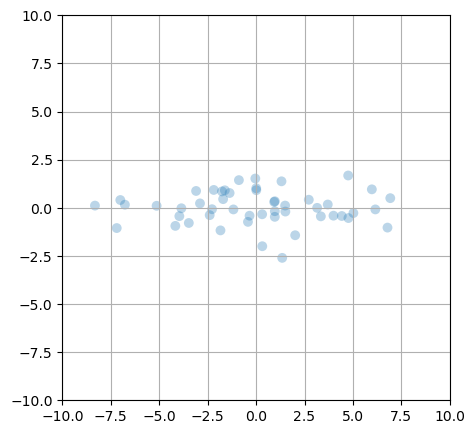

In [18]:
# rotation
A = E.T @ X

plt.figure(figsize=(5,5))
plt.scatter(A[0,:], A[1,:], marker='o', s=50, alpha=0.3, edgecolor='none')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()

In [19]:
E[:,:1]

array([[-0.68758803],
       [-0.72610102]])

In [20]:
E[:,:1].T @ X

array([[-2.89602234e+00, -3.37737948e-01, -3.47243571e+00,
        -7.00759453e+00,  7.11222255e-03,  9.76221420e-03,
        -7.19273112e+00, -3.96125659e+00,  9.67102934e-01,
        -3.09707900e+00,  9.64955633e-01,  9.66207204e-01,
        -1.83843843e+00,  6.78178173e+00,  5.97390812e+00,
         1.31030484e+00,  3.15070606e+00, -2.18492905e+00,
         2.71982396e+00,  4.76361113e+00, -6.77133946e+00,
        -4.01916843e-02, -1.17011390e+00,  4.75319257e+00,
         1.34698938e+00, -1.36698541e+00,  3.69881934e+00,
        -2.39516881e+00,  1.49808789e+00,  3.19392425e-01,
         1.51083918e+00, -8.31716691e+00, -8.87355217e-01,
         3.34231162e+00, -4.16801874e+00,  3.99415079e+00,
        -1.76115039e+00,  6.92574356e+00,  4.42412375e+00,
        -1.70220751e+00, -3.85649138e+00, -1.61267471e+00,
        -4.19536469e-01,  3.11814343e-01,  5.02149584e+00,
         2.01708763e+00,  9.32730629e-01, -5.13510680e+00,
        -2.27517955e+00,  6.15485667e+00]])

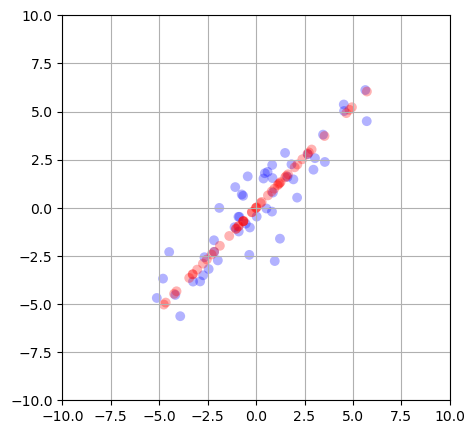

In [21]:
# projected points
P = E[:,:1] @ E[:,:1].T @ X

plt.figure(figsize=(5,5)) 
plt.scatter(X[0,:], X[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none')
plt.scatter(P[0,:], P[1,:], marker='o',color='r', s=50, alpha=0.3, edgecolor='none')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()

### Whitening
- Frequently used to preprocess data, e.g., in signal processing

>$ \displaystyle Z = \Lambda^{-1/2}\ E^T\ X$

- **Unhomework:** Verify that its covariance matrix is identity

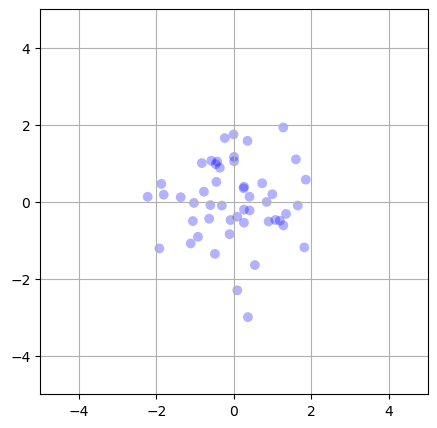

In [22]:
# calc and plot whitened coordinates
B = np.diag(1 / np.sqrt(L)) @ A

plt.figure(figsize=(5,5))
plt.scatter(B[0,:], B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

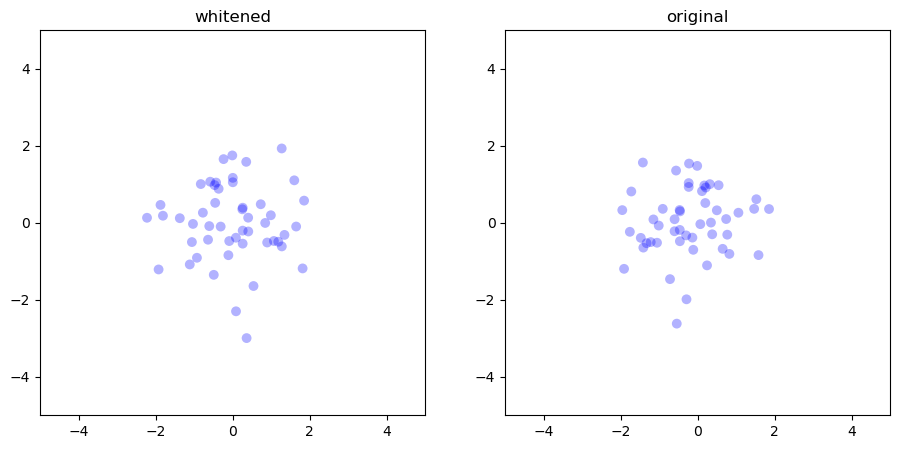

In [23]:
# cf. original normal randoms in cell at the beginning
plt.figure(figsize=(11,5))
plt.subplot(1,2,1).set_aspect('equal'); plt.xlim(-5,5); plt.ylim(-5,5); plt.title('whitened')
plt.scatter(B[0,:], B[1,:], marker='o', color='b', s=50, alpha=0.3, edgecolor='none')
plt.subplot(1,2,2).set_aspect('equal'); plt.xlim(-5,5); plt.ylim(-5,5); plt.title('original')
plt.scatter(N[0,:], N[1,:], marker='o', color='b', s=50, alpha=0.3, edgecolor='none');

In [24]:
# sample covariance matrix is I
B @ B.T / (B.shape[1] - 1)

array([[ 1.00000000e+00, -1.26132915e-16],
       [-1.26132915e-16,  1.00000000e+00]])